OUTLIER DETECTION AND REMOVAL USING ZSCORE, STD DEVIATION

In [45]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(10,6)

In [46]:
df=pd.read_csv("weight-height.csv")
df.sample(5)

,Gender,Height,Weight
2968,Male,73.847530,205.479368
2374,Male,70.752012,197.838902
1533,Male,75.819040,230.939454
1837,Male,71.897045,216.053052
9361,Female,64.141960,144.071684


In [47]:
df=df.drop("Weight",axis= 1)


In [48]:
df

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


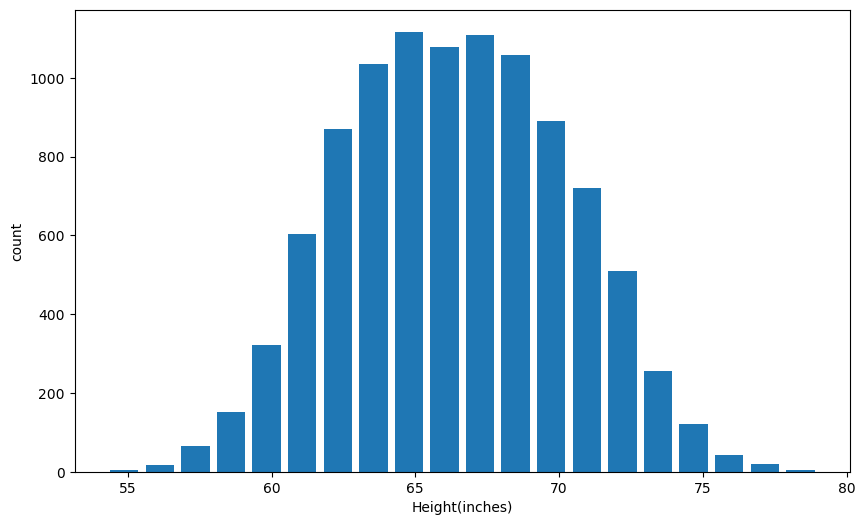

In [49]:
plt.hist(df.Height,bins=20, rwidth= 0.8)
plt.xlabel("Height(inches)")
plt.ylabel("count")
plt.show()

In [50]:
df.Height.min()

54.2631333250971

In [51]:
df.Height.max()

78.9987423463896

In [52]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

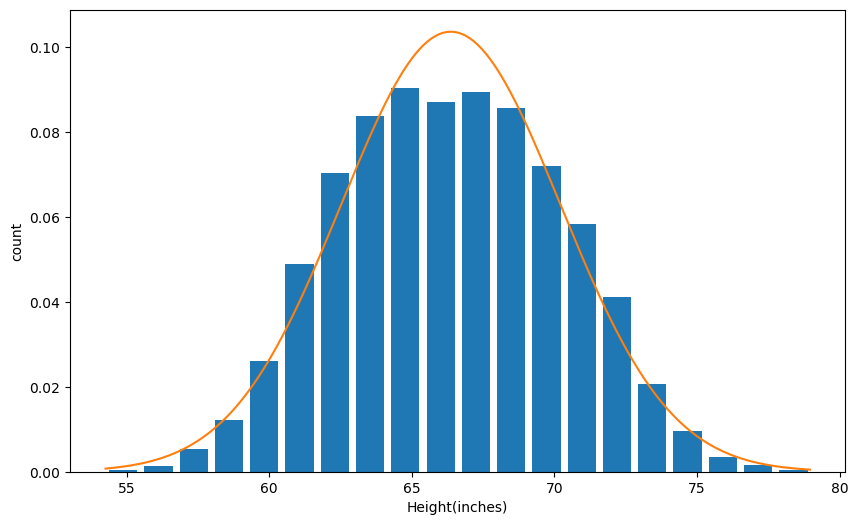

In [53]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
plt.hist(df.Height,bins=20, rwidth= 0.8, density= True)
plt.xlabel("Height(inches)")
plt.ylabel("count")

rng= np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Height.mean(), df.Height.std()))

In [54]:
#SHOWS NORMAL DISTRIBUTION ABOVE

In [55]:
df.Height.mean()

66.36755975482124

In [56]:
df.Height.std()
# standard deviation is how far teh datset is away from the mean.
#standard deviation: 68% of the values are within 1 standard deviation of the mean.
#standard deviation: 95% of the values are within 2 standard deviation of the mean.
#standard deviation: 99.7% of the values are within 3 standard deviation of the mean.

3.8475281207732293

In [57]:
# here we use 3 standard deviation to remove the outliers
# first finding outliers on right side of the dataset.
upper_limit= df.Height.mean()+ 3*df.Height.std()
upper_limit

77.91014411714093

In [58]:
# second finding outliers on left side of the dataset.
lower_limit= df.Height.mean()- 3*df.Height.std()
lower_limit

54.82497539250156

In [59]:
# finding total outliers from the given dataset.
outlier= df[(df.Height>upper_limit) | (df.Height< lower_limit)]
outlier


,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [60]:
# datset without outliers
df_without_outlier= df[(df.Height<upper_limit) & (df.Height> lower_limit)]
df_without_outlier

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [61]:
# Total number of outliers removed from the datset can be calculated as:
df.shape[0]-df_without_outlier.shape[0]


7

Total number of outliers removed: 7

# Using z-score,std to detect and remove outliers

Z score is a way too achievethe same thing that we did in above part.

Z score indicates how many standard deviation away a data point is.

For example: in our case mean si 66.37 and standard deviation is 3.84
if a value of a data point is 771, then Z score is 3, that can be calculated as:
(77.91= 66.37+3

Calculate the  Z-Score:

Z= (x - µ)/ σ

where x is the current datapoint, µ is the mean and σ is the standard deviation.


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 117.3+ KB


In [63]:
df["zscore"]=(df.Height- df.Height.mean())/ df.Height.std()
df.head(5)

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [64]:
# Z score will remove that falls below -3 and above +3,as it considers them as outliers
# Z score consider outliers that are below -3 range and above +3 range.

Interpretatation of first Z-score

In [65]:
(73.847017- 66.36755975482124)/3.8475281207732293

1.9439642831448936

In [66]:
df[df["zscore"]>3]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [67]:
df[df["zscore"]<-3]

,Gender,Height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [68]:
df[(df.zscore<-3)| (df.zscore>3)]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [69]:
# shows 7 outlier here.
df_without_outliers_by_zscore= df[(df.zscore>-3)&(df.zscore<3)]
df_without_outliers_by_zscore.head()

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


dataframe(df_without_outliers_by_zscore) shows dataset without outliers through zscoremethod

In [70]:
df.shape[0]- df_without_outliers_by_zscore.shape[0]

7

TOTAL OUTLIERS REMOVED: 7